# Held-Karp algorithm that reduces with complexity O(n^22^n)

In [1]:
using Combinatorics
using Plots
using BenchmarkTools

In [2]:
numb = 11
X = rand(numb)
Y = rand(numb)
D = [sqrt((X[i]-X[j])^2 + (Y[i]-Y[j])^2) for j = 1:length(X), i = 1:length(X)];

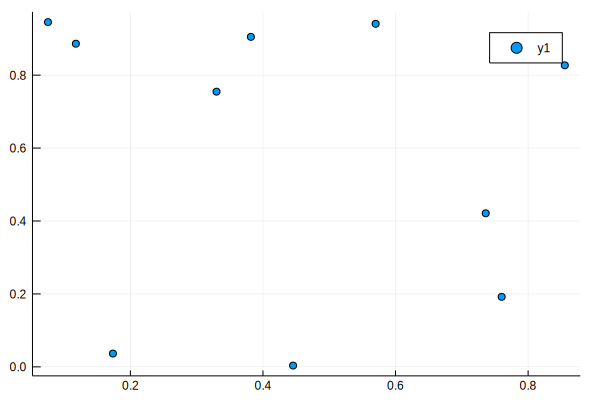

In [3]:
scatter(X,Y)

In [4]:
function Held_Karp(D)
    n = size(D,1)
    C2 = zeros(n-1,1)
    for k = 2:n
        C2[k-1,1] = D[1,k]
    end

    sub_sets2 = 2:n
    row = 0
    col = 0

    for s = 2:n-1

        sub_sets1 = combinations(2:n,s)
        ind = factorial(n-1)/(factorial(s)*factorial(n-1-s))
        C1 = zeros(ind,s)
        flag = 1

        for S in sub_sets1
            for k in S
                dist = Inf
                index = findfirst(S,k)
                for m in S
                    if m != k
                        row = Bool[S[1:end .!= index]==sub_sets2[i,:] for i=1:size(sub_sets2,1) ]
                        col = Bool[sub_sets2[row,i]==[m] for i=1:s-1]
                        temp_dist = D[Int(m),Int(k)] + C2[ row,col] 
                        if  temp_dist[1] < dist
                            dist = temp_dist[1]
                        end
                    end
                end
                C1[flag,index] = dist
#                C1[flag,k] = minimum(D[1:end .!= k,k]+C2[ Bool[S[1:end .!= k]==sub_sets2[i,:] for i=1:size(sub_sets2,1) ]])
            end
            flag = flag + 1
        end
        i = 0
        sub_sets2 = zeros(ind,s)
        for S in sub_sets1
            i = i + 1
            sub_sets2[i,:] = S
        end

        C2 = copy(C1)
    end

    S = 2:n 
    k = 1
    index = findfirst(S,k)
    s = n
    dist = Inf
    for m in S
        if m != k
            row = Bool[S[1:end .!= index]==sub_sets2[i,:] for i=1:size(sub_sets2,1) ]
            col = Bool[sub_sets2[row,i]==[m] for i=1:s-1]
            temp_dist = D[Int(m),Int(k)] + C2[ row,col] 
            if  temp_dist[1] < dist
                dist = temp_dist[1]
            end
        end
    end

    opt = dist
    return opt
end

Held_Karp (generic function with 1 method)

In [5]:
opt = Held_Karp(D)

3.175334638932068

# Benchmark

In [7]:
numb = 4:2:10
tm = zeros(length(numb))
for i=1:length(numb)
    X = rand(numb[i])
    Y = rand(numb[i])
    D = [sqrt((X[i]-X[j])^2 + (Y[i]-Y[j])^2) for j = 1:length(X), i = 1:length(X)];
    bm = @benchmark Held_Karp(D)
    tm[i] = minimum(bm.times)/10^3;
end

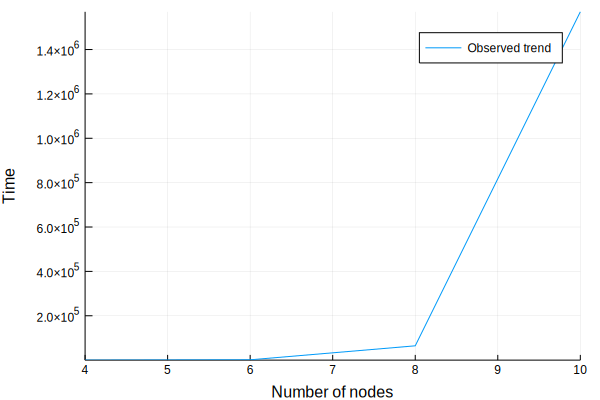

In [13]:
plot(numb,tm, label="Observed trend",xlabel="Number of nodes",ylabel="Time")